### General information
The dataset used was downloaded from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).  For more information about the data (e.g Licensing), please visit the website. 

The subset that was used was: *heart_2022_no_nans.csv*, which was already pre-processed. For this reason, this notebook won't have a heavy cleaning process but rather a feature selection for the parameters that we will use. 

##### Import necessary libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
from sklearn.utils import resample  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #to print all the columns when doing things like .head()


##### Data exploration

In [2]:
df=pd.read_csv("data/heart-categories.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


##### Selection of features
Please be aware that this model doesn't aim to create a perfect model, but is rather a toy model with which to practice learning algorithms like logistic regression. That's why the features chosen may or may not be right, so please use with care. 

In [3]:
columns_to_drop=["State","LastCheckupTime","RemovedTeeth","HadSkinCancer","DeafOrHardOfHearing","BlindOrVisionDifficulty","DifficultyConcentrating","DifficultyWalking","DifficultyDressingBathing","DifficultyErrands","RaceEthnicityCategory","HIVTesting","FluVaxLast12","PneumoVaxEver","ChestScan","TetanusLast10Tdap","CovidPos","HeightInMeters","WeightInKilograms","ECigaretteUsage"]
df.drop(columns=columns_to_drop,inplace=True)
df.head() #showing selected features that will be used. 


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,No,No,No,No,Yes,No,Former smoker,Age 65 to 69,27.99,No,No
1,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,No,No,No,No,Yes,Yes,Former smoker,Age 70 to 74,30.13,No,No
2,Male,Very good,0.0,0.0,No,8.0,No,No,No,No,No,No,No,Yes,No,Former smoker,Age 75 to 79,31.66,Yes,No
3,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,No,No,Yes,No,Yes,No,Never smoked,Age 80 or older,31.32,No,No
4,Female,Good,3.0,15.0,Yes,5.0,No,No,No,No,No,No,No,Yes,No,Never smoked,Age 80 or older,33.07,No,No


##### One hot encoding

We will start by seeing what all the unique values are in each column so we can decide how we will encode the different variables.

In [4]:
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)

{'Sex': array(['Female', 'Male'], dtype=object), 'GeneralHealth': array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object), 'PhysicalHealthDays': array([ 4.,  0.,  5.,  3.,  2., 25., 30., 15., 29.,  8., 16., 20., 10.,
        9.,  7.,  1., 21.,  6., 27., 14., 12., 11., 13., 28., 17., 23.,
       24., 26., 18., 22., 19.]), 'MentalHealthDays': array([ 0., 15.,  4., 25.,  5., 30., 27.,  3.,  2.,  1., 10., 20., 21.,
        6.,  7.,  8., 14.,  9., 12., 18., 29., 28., 17., 11., 16., 13.,
       26., 22., 24., 19., 23.]), 'PhysicalActivities': array(['Yes', 'No'], dtype=object), 'SleepHours': array([ 9.,  6.,  8.,  5.,  7., 10.,  4., 12.,  3., 18., 11.,  2.,  1.,
       16., 14., 15., 13., 20., 24., 23., 19., 17., 22.]), 'HadHeartAttack': array(['No', 'Yes'], dtype=object), 'HadAngina': array(['No', 'Yes'], dtype=object), 'HadStroke': array(['No', 'Yes'], dtype=object), 'HadAsthma': array(['No', 'Yes'], dtype=object), 'HadCOPD': array(['No', 'Yes'], dtype=object), 'HadDepressi

Mapping and encoding of variables

In [5]:
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df["HadDiabetes"]=df["HadDiabetes"].map({"No":0,"No, pre-diabetes or borderline diabetes":1,"Yes, but only during pregnancy (female)":2,"Yes":3})


columns_to_map_yes_no = ['PhysicalActivities',"HadAngina","HadStroke","HadHeartAttack","HadAsthma","HadCOPD","HadDepressiveDisorder","HadKidneyDisease","HadArthritis","AlcoholDrinkers","HighRiskLastYear"]
# Apply the replace function to specific columns in the DataFrame
df[columns_to_map_yes_no] = df[columns_to_map_yes_no].replace({'Yes': 1, 'No': 0})


health_map = {
    'Very good': 4,
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
smoker_map={
    "Never smoked":0,
    "Former smoker":1,
    "Current smoker - now smokes some days":3,
    "Current smoker - now smokes every day":4
}
age_map = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

# Apply the mapping using map function
df['AgeCategory'] = df['AgeCategory'].map(age_map)
df["GeneralHealth"]=df["GeneralHealth"].map(health_map)
df["SmokerStatus"]=df["SmokerStatus"].map(smoker_map)

# Print the result
df.head()

C:\Users\14smi\AppData\Local\Temp\ipykernel_13604\2914941063.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_map_yes_no] = df[columns_to_map_yes_no].replace({'Yes': 1, 'No': 0})


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,0,4,4.0,0.0,1,9.0,0,0,0,0,0,0,0,1,0,1,9,27.99,0,0
1,1,4,0.0,0.0,1,6.0,0,0,0,0,0,0,0,1,3,1,10,30.13,0,0
2,1,4,0.0,0.0,0,8.0,0,0,0,0,0,0,0,1,0,1,11,31.66,1,0
3,0,1,5.0,0.0,1,9.0,0,0,0,0,0,1,0,1,0,0,12,31.32,0,0
4,0,2,3.0,15.0,1,5.0,0,0,0,0,0,0,0,1,0,0,12,33.07,0,0


Check if we made an error or some variables were encoded wrong. 

Final display of variables that will be used, already encoded.

In [6]:
any_nan = df.isna().any().any()
if any_nan==False: 
    print("Everything looks good!")
else:
    print("There might be a mistake. Please re-check the data")

df.head()

Everything looks good!


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,0,4,4.0,0.0,1,9.0,0,0,0,0,0,0,0,1,0,1,9,27.99,0,0
1,1,4,0.0,0.0,1,6.0,0,0,0,0,0,0,0,1,3,1,10,30.13,0,0
2,1,4,0.0,0.0,0,8.0,0,0,0,0,0,0,0,1,0,1,11,31.66,1,0
3,0,1,5.0,0.0,1,9.0,0,0,0,0,0,1,0,1,0,0,12,31.32,0,0
4,0,2,3.0,15.0,1,5.0,0,0,0,0,0,0,0,1,0,0,12,33.07,0,0


Check if data is skewed:

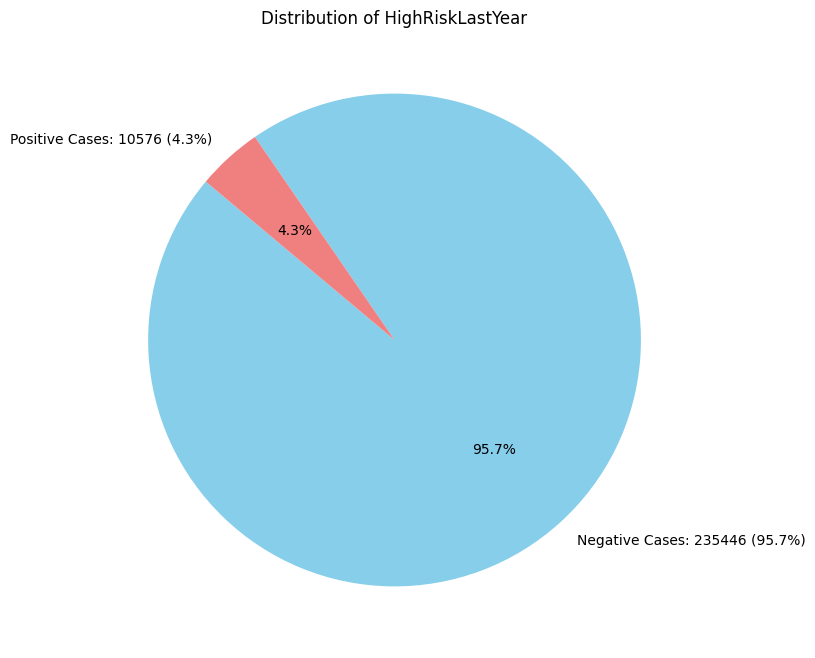

In [7]:
value_counts = df['HighRiskLastYear'].value_counts()

# Convert value_counts to a DataFrame for easier manipulation
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['HighRiskLastYear', 'Count']

# Map the values to labels
value_counts_df['Label'] = value_counts_df['HighRiskLastYear'].map({1: 'Positive Cases', 0: 'Negative Cases'})

# Calculate the percentages
total = value_counts_df['Count'].sum()
value_counts_df['Percentage'] = (value_counts_df['Count'] / total) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
labels = [f'{row.Label}: {row.Count} ({row.Percentage:.1f}%)' for row in value_counts_df.itertuples()]

plt.pie(value_counts_df['Count'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of HighRiskLastYear')

# Show the plot
plt.show()


As we can see, the data is very skewed. It's typical for these types of classification problems (like rare diseases, frauds, etc...) to have a skewed dataset. 

We will try to train the model with this skewed dataset and see what happens. 

##### Scaling and splitting training and testing sets

In [8]:
#Input variables and targets
scaler=StandardScaler()
X=df.drop(columns=["HighRiskLastYear"])
X_scaled=scaler.fit_transform(X)
y=df["HighRiskLastYear"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Now we will train the model and fit it to our data. 

In [9]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Predictions and summary of the model's results:

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     47157
           1       0.35      0.06      0.10      2048

    accuracy                           0.96     49205
   macro avg       0.66      0.53      0.54     49205
weighted avg       0.94      0.96      0.94     49205



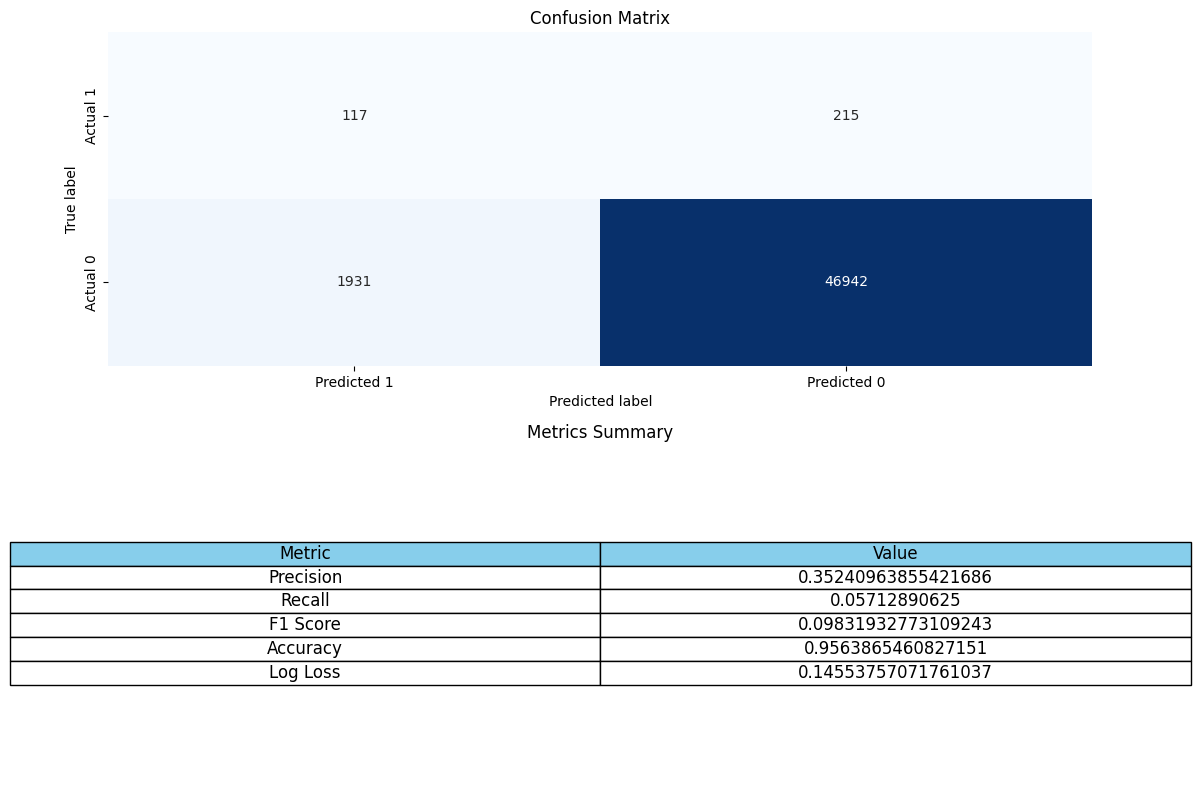

In [10]:
y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.3 #since heart diseases are relatively rare we want to get a higher recall value. This, of course, comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate the accuracy, confusion matrix, and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Classification Report:\n", classification_rep)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table for precision, recall, F1 score, accuracy, and log loss
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Log Loss']
values = [precision, recall, f1, accuracy, logloss]

plt.subplot(2, 1, 2)
plt.axis('tight')
plt.axis('off')
table_data = [[metrics[i], values[i]] for i in range(len(metrics))]
table = plt.table(cellText=table_data, colLabels=['Metric', 'Value'], loc='center', cellLoc='center', colColours=['skyblue']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Metrics Summary')

plt.tight_layout()
plt.show()


As we can see, we don't get really good results. This may be because of the skewed data. Let's see the behaviour of these parameters as a function of the threshold, and see if we can choose a better value for it. 

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

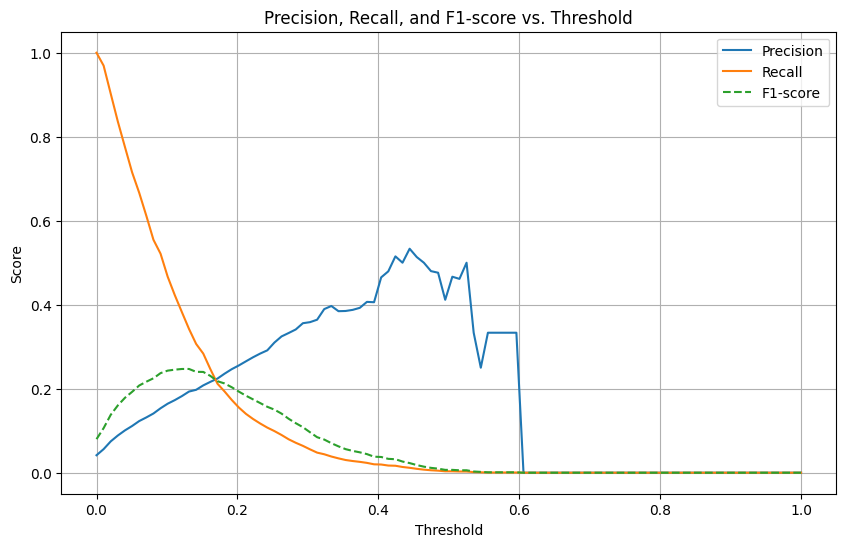

In [11]:
# Example precision and recall values
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision, recall, and F1-score
precisions = []
recalls = []    
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision, recall, and F1-score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


As we can see in the plot, the model is not really good. Even if we were to choose the optimal threshold value, the precision and recall values would still be too low to really be of use. 

As a first improvement, we will proceed by oversampling our data. In this case, since we have very few positive values, oversampling will generate synthetic data for us in order to achieve a balance between positive and negative cases. 
We will do this by using the SMOTE process. SMOTE identifies the minority class and by using nearest neghbours it generates synthetic data for such class. 

Be aware that this may help reduce overfitting in our model, but may come at the expense of generating noisy data. 

Here we have the generation of synthetic data. We can see that we started with an imbalanced set, which ended up being balanced.

After SMOTE
HighRiskLastYear=0:  188289
HighRiskLastYear=1:  188289
Original training set
HighRiskLastYear=0:  188289
HighRiskLastYear=1:  8528


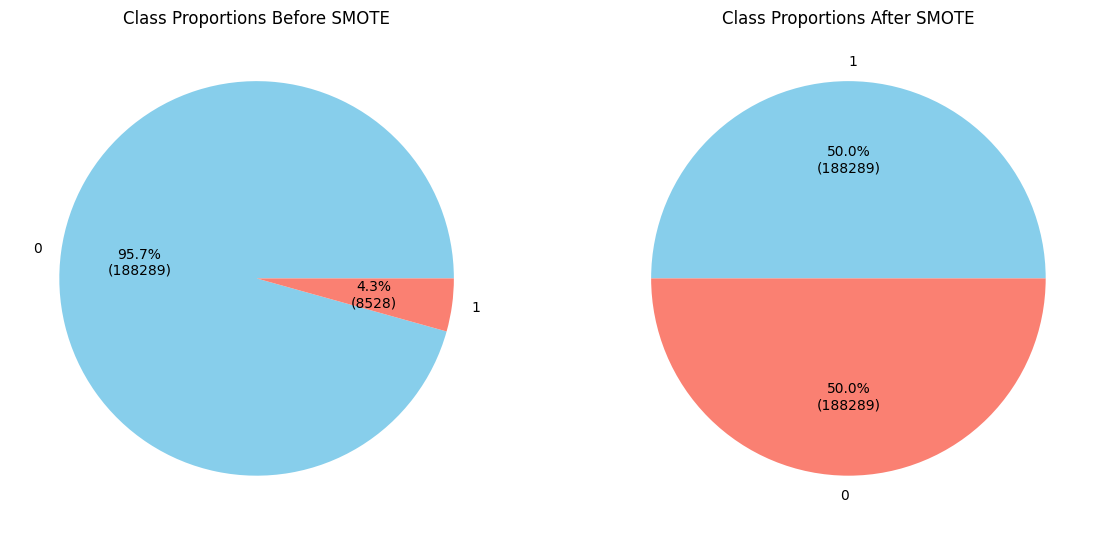

In [12]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the classes in the resampled training set
print("After SMOTE")
print("HighRiskLastYear=0: ", sum(y_train_smote == 0))
print("HighRiskLastYear=1: ", sum(y_train_smote == 1))

# Check the distribution of the classes in the original training set
print("Original training set")
print("HighRiskLastYear=0: ", sum(y_train == 0))
print("HighRiskLastYear=1: ", sum(y_train == 1))

class_counts_before = y_train.value_counts(normalize=False)
class_counts_after = y_train_smote.value_counts(normalize=False)

# Function to format autopct to show count and percentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

# Plotting the proportions before and after SMOTE using pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Before SMOTE
ax[0].pie(class_counts_before, labels=class_counts_before.index, autopct=autopct_format(class_counts_before), colors=['skyblue', 'salmon'])
ax[0].set_title('Class Proportions Before SMOTE')

# After SMOTE
ax[1].pie(class_counts_after, labels=class_counts_after.index, autopct=autopct_format(class_counts_after), colors=['skyblue', 'salmon'])
ax[1].set_title('Class Proportions After SMOTE')

plt.show()

Now we will train the model with these newly oversampled data. 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     47157
           1       0.08      0.90      0.14      2048

    accuracy                           0.53     49205
   macro avg       0.53      0.71      0.41     49205
weighted avg       0.95      0.53      0.66     49205



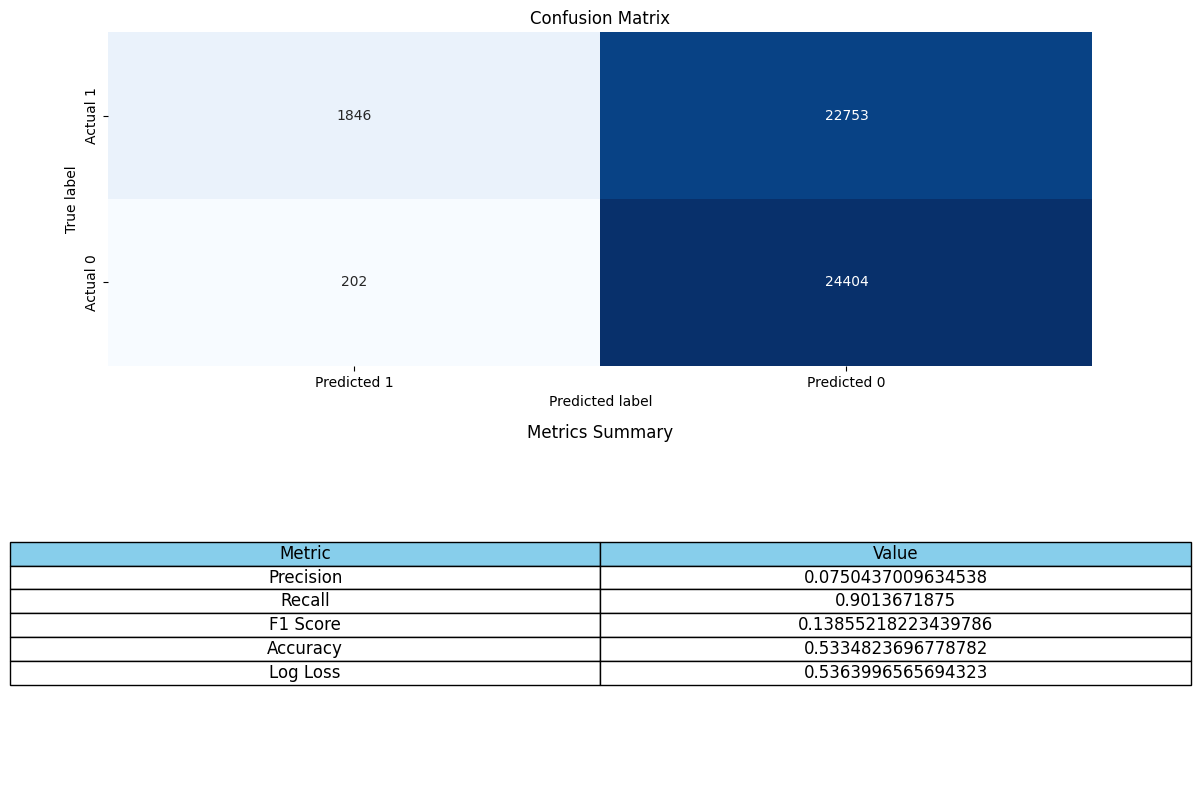

In [13]:
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.3 #since heart diseases are relatively rare we want to get a higher recall value. This, of course, comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate the accuracy, confusion matrix, and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Classification Report:\n", classification_rep)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table for precision, recall, F1 score, accuracy, and log loss
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Log Loss']
values = [precision, recall, f1, accuracy, logloss]

plt.subplot(2, 1, 2)
plt.axis('tight')
plt.axis('off')
table_data = [[metrics[i], values[i]] for i in range(len(metrics))]
table = plt.table(cellText=table_data, colLabels=['Metric', 'Value'], loc='center', cellLoc='center', colColours=['skyblue']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Metrics Summary')

plt.tight_layout()
plt.show()


c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

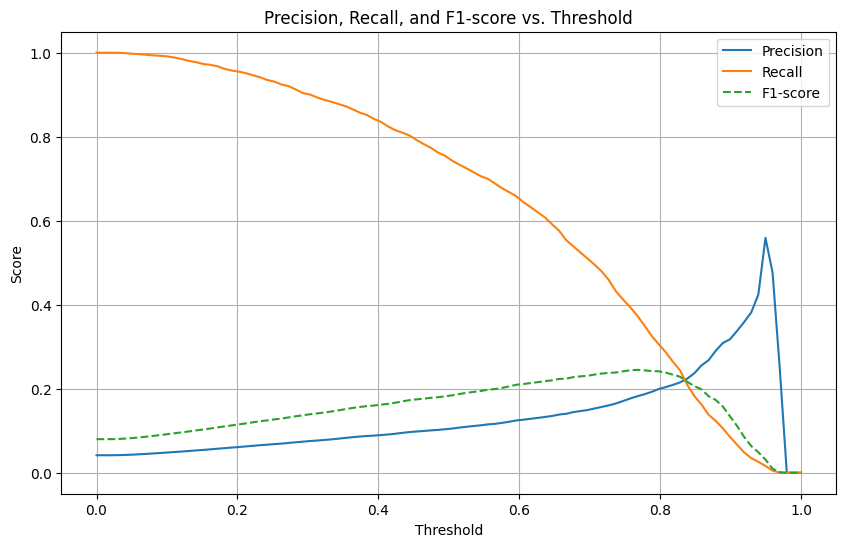

In [14]:
# Example precision and recall values
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision, recall, and F1-score
precisions = []
recalls = []    
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision, recall, and F1-score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


As we can see, the model has improved by some margin, but it's still far from being a useful model. Nevertheless, it's interesting to see the slight improvement of performance when applying resampling methods like SMOTE. 

Now, we will try to do a new type of resampling: Undersampling. In this case, we will reduce the number of majority classes until they are equal to the number of minority classes. This helps reduce imbalance but comes at the cost of loss of information. We will do this witht the scikit learn function *resample*.

Before undersampling
HighRiskLastYear=0:  235446
HighRiskLastYear=1:  10576
After undersampling
HighRiskLastYear=0:  10576
HighRiskLastYear=1:  10576


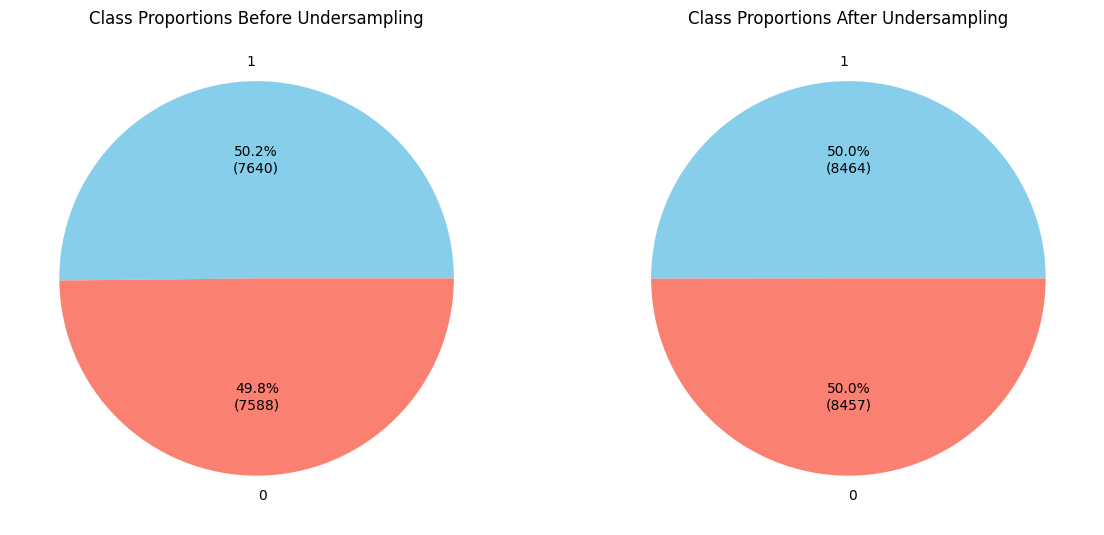

In [21]:
class_counts_before = y_train.value_counts(normalize=False)

# Separate majority and minority classes
df_majority = df[df['HighRiskLastYear'] == 0]
df_minority = df[df['HighRiskLastYear'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # sample without replacement
                                   n_samples=len(df_minority),    # to match minority class
                                   random_state=42)   # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target variable
X = df_downsampled.drop('HighRiskLastYear', axis=1)
y = df_downsampled['HighRiskLastYear']

#Input variables and targets
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the distribution of the classes in the original training set
print("Before undersampling")
print("HighRiskLastYear=0: ", len(df_majority))
print("HighRiskLastYear=1: ", len(df_minority))

# Check the distribution of the classes in the undersampled training set
print("After undersampling")
print("HighRiskLastYear=0: ", sum(y == 0))
print("HighRiskLastYear=1: ", sum(y == 1))

class_counts_after = y_train.value_counts(normalize=False)

# Function to format autopct to show count and percentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

# Plotting the proportions before and after undersamping using pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Before undersampling
ax[0].pie(class_counts_before, labels=class_counts_before.index, autopct=autopct_format(class_counts_before), colors=['skyblue', 'salmon'])
ax[0].set_title('Class Proportions Before Undersampling')

# After undersampling
ax[1].pie(class_counts_after, labels=class_counts_after.index, autopct=autopct_format(class_counts_after), colors=['skyblue', 'salmon'])
ax[1].set_title('Class Proportions After Undersampling')

plt.show()

Now we will train our model again and see the performance of its precision and recall as a function of the thresholds. 

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.75      2119
           1       0.80      0.54      0.64      2112

    accuracy                           0.70      4231
   macro avg       0.73      0.70      0.69      4231
weighted avg       0.73      0.70      0.69      4231



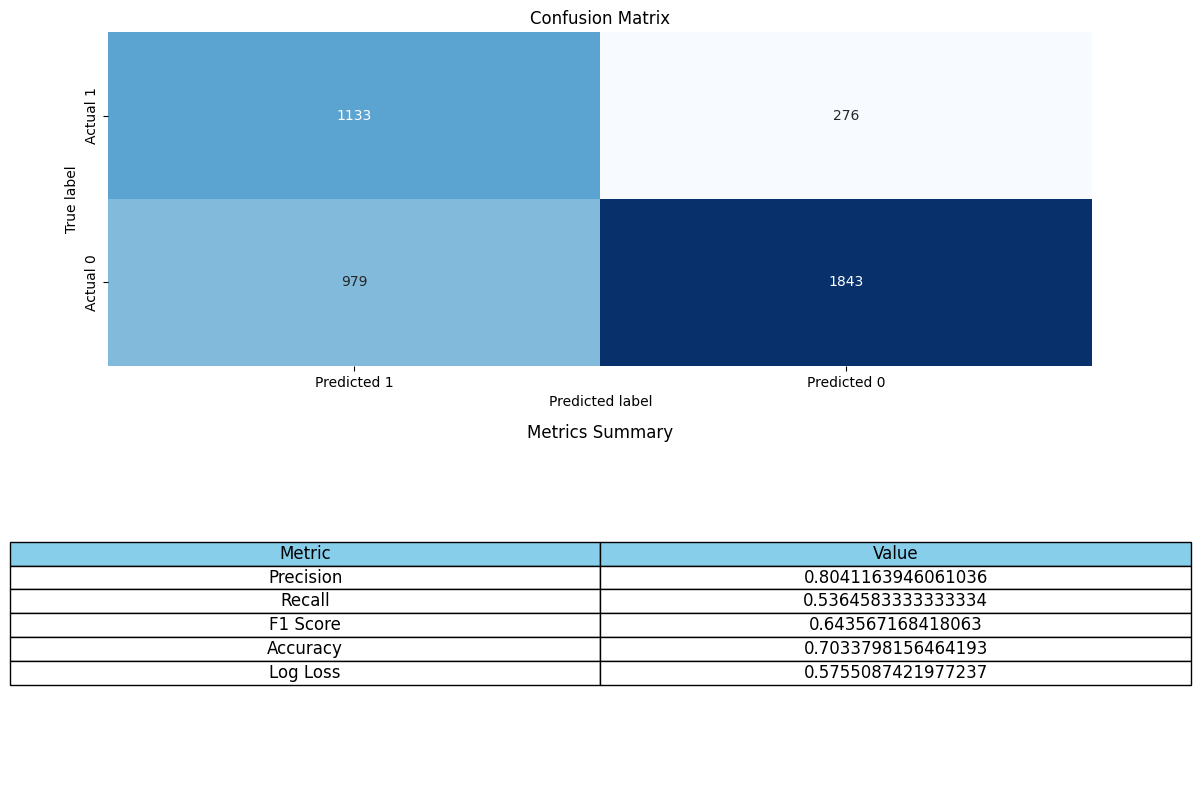

In [16]:
y_pred_proba=model.predict_proba(X_test)  
threshold=0.5
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate the accuracy, confusion matrix, and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Classification report:\n", classification_rep)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table for precision, recall, F1 score, accuracy, and log loss
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Log Loss']
values = [precision, recall, f1, accuracy, logloss]

plt.subplot(2, 1, 2)
plt.axis('tight')
plt.axis('off')
table_data = [[metrics[i], values[i]] for i in range(len(metrics))]
table = plt.table(cellText=table_data, colLabels=['Metric', 'Value'], loc='center', cellLoc='center', colColours=['skyblue']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Metrics Summary')

plt.tight_layout()
plt.show()


This was a great step towards the right direction! Our model seems to have been improved by a large margin with respect to the previous two methods. Now, we will choose the best threshold value to fine tune it a little bit more. 

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

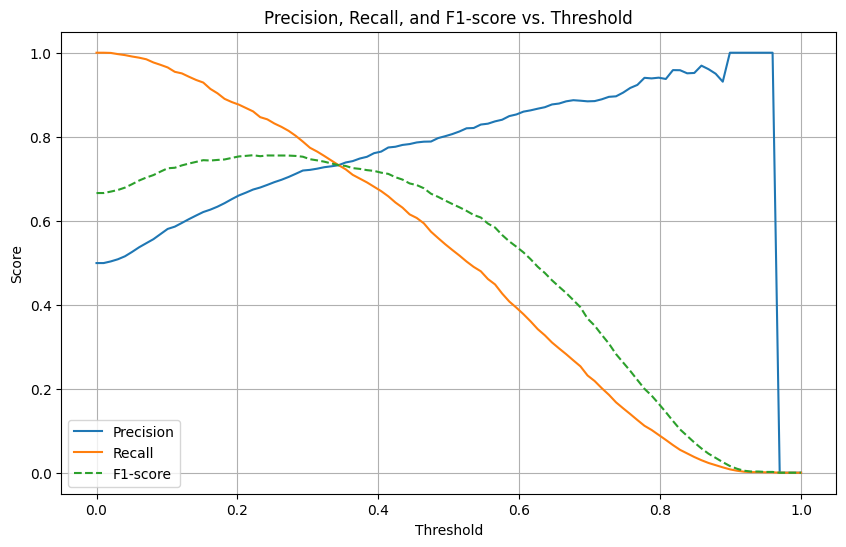

In [17]:
# Example precision and recall values
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision, recall, and F1-score
precisions = []
recalls = []    
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision, recall, and F1-score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


We will choose the threshold that yields the maximum F1-score, in this case, as a common procedure. 

In [18]:
ind=f1_scores.index(max(f1_scores))
optimal_threshold=thresholds[ind]
print("The optimal threshold is:",optimal_threshold)


The optimal threshold is: 0.22222222222222224


So, to get the results of the model for the best chosen threshold, we have:

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      2119
           1       0.67      0.86      0.76      2112

    accuracy                           0.72      4231
   macro avg       0.74      0.72      0.72      4231
weighted avg       0.74      0.72      0.72      4231



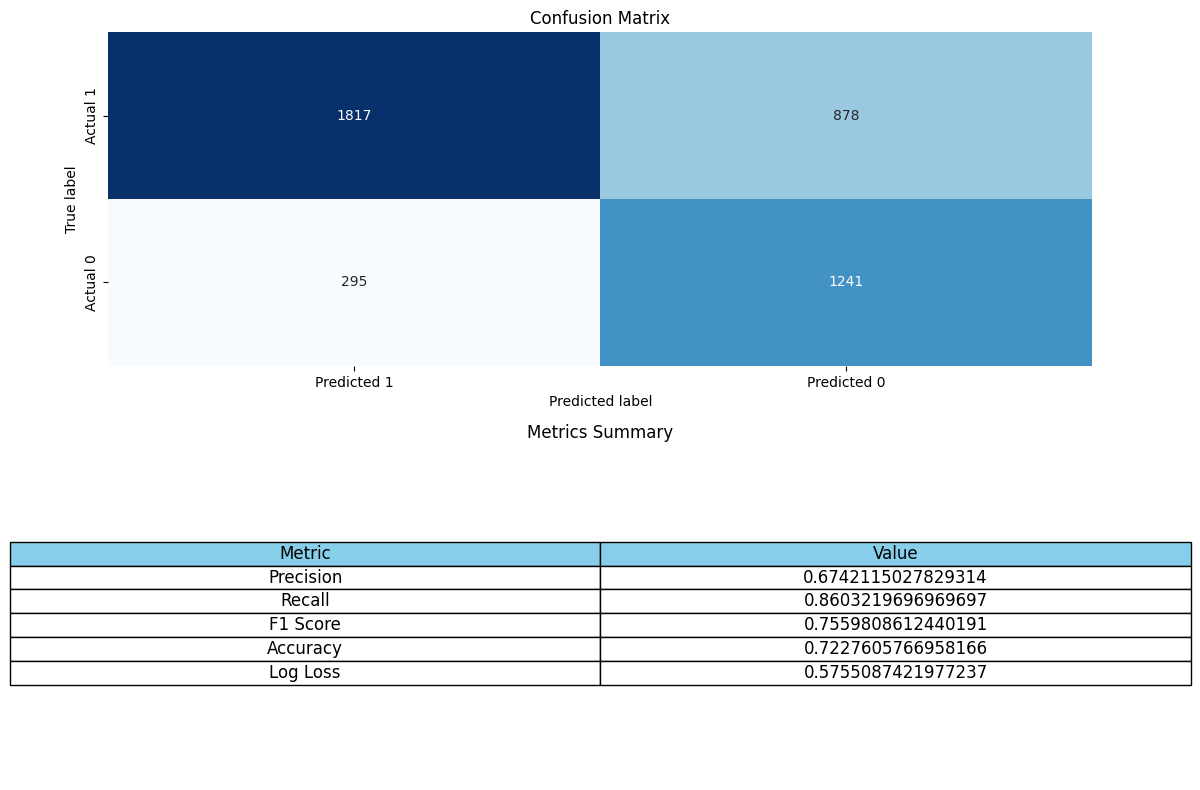

In [19]:
y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=optimal_threshold #since heart diseases are relatively rare we want to get a higher recall value. This, of course, comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate the accuracy, confusion matrix, and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Classification Report:\n", classification_rep)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table for precision, recall, F1 score, accuracy, and log loss
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Log Loss']
values = [precision, recall, f1, accuracy, logloss]

plt.subplot(2, 1, 2)
plt.axis('tight')
plt.axis('off')
table_data = [[metrics[i], values[i]] for i in range(len(metrics))]
table = plt.table(cellText=table_data, colLabels=['Metric', 'Value'], loc='center', cellLoc='center', colColours=['skyblue']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Metrics Summary')

plt.tight_layout()
plt.show()


Finally, as a comparison to the blood data, we can see how the log-loss function behaves as a function of the data used. 

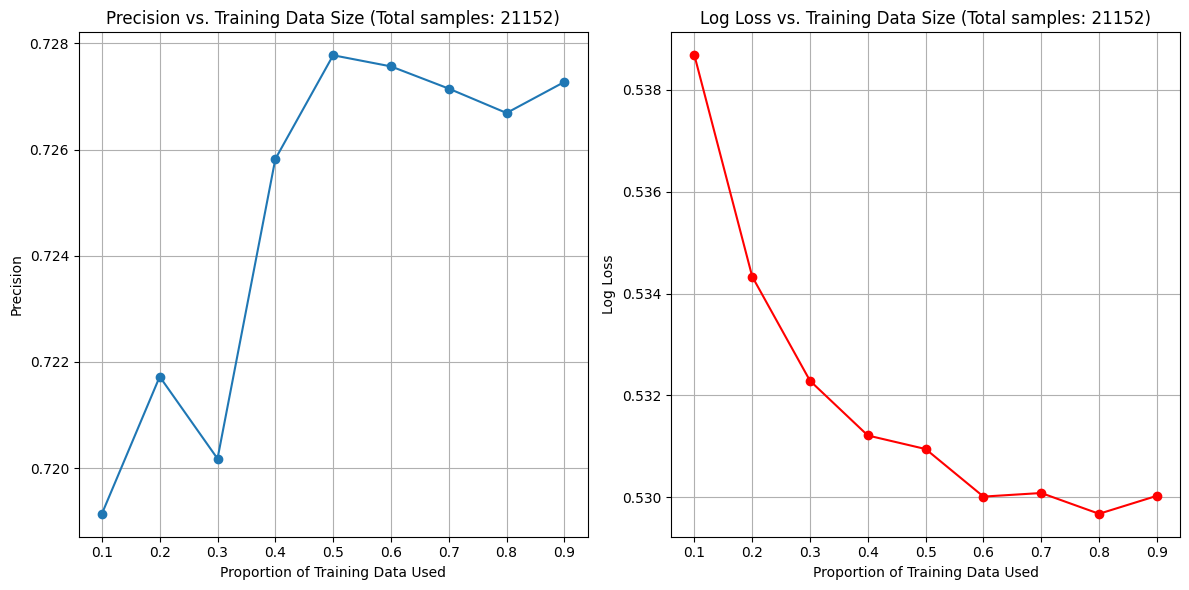

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, log_loss
from sklearn.utils import resample

# Assuming df is already defined and contains the dataset

# Separate majority and minority classes
df_majority = df[df['HighRiskLastYear'] == 0]
df_minority = df[df['HighRiskLastYear'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # sample without replacement
                                   n_samples=len(df_minority),    # to match minority class
                                   random_state=42)   # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target variable
X = df_downsampled.drop('HighRiskLastYear', axis=1)
y = df_downsampled['HighRiskLastYear']

# Input variables and targets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to hold results
training_sizes = np.linspace(0.1, 0.9, 9)  # Changed to range from 0.1 to 0.9
precisions = []
log_losses = []

# Loop over different training sizes
for train_size in training_sizes:
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=42)
    
    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate precision
    y_pred_proba = model.predict_proba(X_test)
    threshold = 0.5
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    
    # Calculate log loss (binary cross-entropy)
    logloss = log_loss(y_test, y_pred_proba)
    log_losses.append(logloss)

# Plot precision as a function of training data size
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_sizes, precisions, marker='o')
plt.title(f'Precision vs. Training Data Size (Total samples: {len(X)})')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Precision')
plt.grid(True)

# Plot log loss as a function of training data size
plt.subplot(1, 2, 2)
plt.plot(training_sizes, log_losses, marker='o', color='r')
plt.title(f'Log Loss vs. Training Data Size (Total samples: {len(X)})')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()



As we can see, the log loss in this case stabilizes when more data is used, and we can see a threshold being reached. This remarks the importance of having enough data to make a good model, as maybe the previous model could have been better if more data was available. 